In [118]:
import pandas as pd

df = pd.read_excel('khang.xlsx')

df.head()

,name,unix_time,value,confidence,date,person,activity,stress_lvl
0,HeartRate,1706035099,150.0,100.0,2024-01-23 19:38:00,Khang,Chill,0.0
1,HeartRate,1706035105,187.0,0.0,2024-01-23 19:38:00,Khang,Chill,NaN
2,HeartRate,1706035110,52.0,0.0,2024-01-23 19:38:00,Khang,Chill,NaN
3,HeartRate,1706035115,76.0,0.0,2024-01-23 19:38:00,Khang,Chill,NaN
4,HeartRate,1706035120,45.0,0.0,2024-01-23 19:38:00,Khang,Chill,NaN


In [119]:
df.drop(columns=['name', 'date'], inplace=True)

df.head()

,unix_time,value,confidence,person,activity,stress_lvl
0,1706035099,150.0,100.0,Khang,Chill,0.0
1,1706035105,187.0,0.0,Khang,Chill,NaN
2,1706035110,52.0,0.0,Khang,Chill,NaN
3,1706035115,76.0,0.0,Khang,Chill,NaN
4,1706035120,45.0,0.0,Khang,Chill,NaN


In [120]:
df = df.sort_values(by='unix_time')

df.head()

,unix_time,value,confidence,person,activity,stress_lvl
0,1706035099,150.0,100.0,Khang,Chill,0.0
1,1706035105,187.0,0.0,Khang,Chill,NaN
2,1706035110,52.0,0.0,Khang,Chill,NaN
3,1706035115,76.0,0.0,Khang,Chill,NaN
4,1706035120,45.0,0.0,Khang,Chill,NaN


In [137]:
df_filtered = df.copy()
df_filtered.loc[df_filtered['confidence'] < 60, 'confidence'] = 0

df_filtered.head()

,unix_time,value,confidence,person,activity,stress_lvl
0,1706035099,150.0,100.0,Khang,Chill,0.0
1,1706035105,187.0,0.0,Khang,Chill,NaN
2,1706035110,52.0,0.0,Khang,Chill,NaN
3,1706035115,76.0,0.0,Khang,Chill,NaN
4,1706035120,45.0,0.0,Khang,Chill,NaN


In [138]:
#df_filtered = df_filtered.dropna(subset=['unix_time'])
#df_filtered.loc[df_filtered['confidence'].isnull, 'confidence'] = 0.0

#max_indices = df_filtered.groupby('unix_time')['confidence'].idxmax()
#df_filtered = df_filtered.loc[max_indices]


grouped = df_filtered.groupby('unix_time')

agg_functions = {
    'value': 'mean', 
    'confidence': 'max',
    'person': 'first',
    'activity': 'first',
    'stress_lvl': 'first'
}

df_filtered = grouped.agg(agg_functions).reset_index()


df_filtered.head()

,unix_time,value,confidence,person,activity,stress_lvl
0,1706035099,150.0,100.0,Khang,Chill,0.0
1,1706035105,187.0,0.0,Khang,Chill,NaN
2,1706035110,52.0,0.0,Khang,Chill,NaN
3,1706035115,76.0,0.0,Khang,Chill,NaN
4,1706035120,45.0,0.0,Khang,Chill,NaN


In [139]:
df_filtered.count()

unix_time     261415
value         261392
confidence    261392
person        261415
activity      261415
stress_lvl        65
dtype: int64

In [140]:
df.count()

unix_time     560374
value         560351
confidence    560351
person        560374
activity      560374
stress_lvl       120
dtype: int64

In [141]:
df_interpolate = df_filtered.copy()
df_interpolate['stress_lvl'] = df_interpolate['stress_lvl'].interpolate(method="linear")

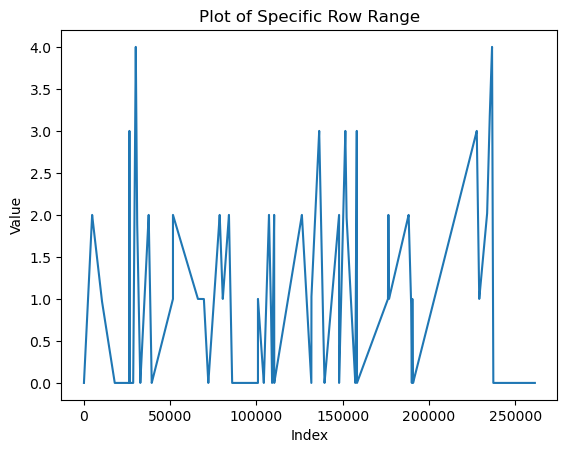

In [146]:
import matplotlib.pyplot as plt

plt.plot(df_interpolate['stress_lvl'])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Specific Row Range')
plt.show()

In [147]:
import numpy as np

df_interpolate.loc[df_interpolate['confidence'] == 0, 'value'] = np.nan

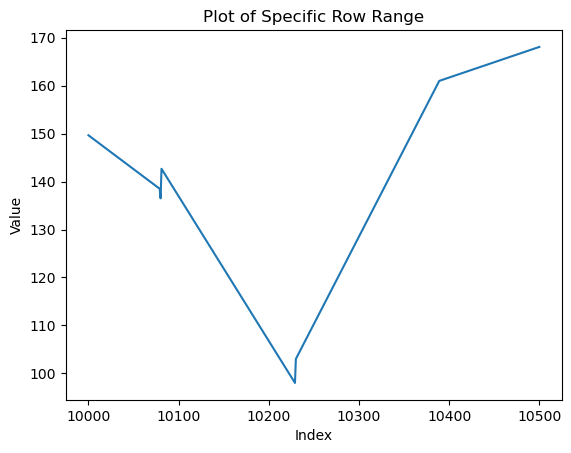

In [148]:
df_interpolate_value = df_interpolate.copy()
df_interpolate_value['value'] = df_interpolate_value['value'].interpolate(method="linear")

start_index = 10000
end_index = 10500


plt.plot(df_interpolate_value.index[start_index:end_index+1], df_interpolate_value['value'].iloc[start_index:end_index+1])
#plt.plot(df_interpolate_value['value'])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Specific Row Range')
plt.show()

In [149]:
df_interpolate_value.head()

,unix_time,value,confidence,person,activity,stress_lvl
0,1706035099,150.000000,100.0,Khang,Chill,0.000000
1,1706035105,147.666667,0.0,Khang,Chill,0.000421
2,1706035110,145.333333,0.0,Khang,Chill,0.000843
3,1706035115,143.000000,0.0,Khang,Chill,0.001264
4,1706035120,140.666667,0.0,Khang,Chill,0.001685
